In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [13]:
#Al tratarse de una serie de tiempo colocamos la fecha como indice
st = pd.read_csv("gold.csv", index_col = "Date", parse_dates = True)
st.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


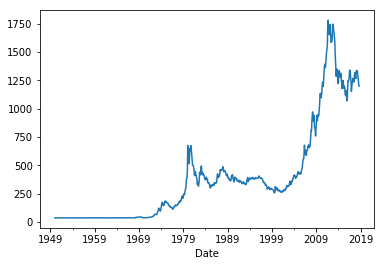

In [14]:
#Vemos una primera grafica de la serie de tiempo
#Podemos observar que el precio ha ido aumentando con el tiempo
st["Price"].plot()

In [15]:
#Evaluamos datos estadisticos de los mismos
st["Price"].describe()

count     825.000000
mean      388.730868
std       424.991665
min        34.490000
25%        35.190000
50%       310.045000
75%       429.140000
max      1780.648000
Name: Price, dtype: float64

In [16]:
#Aplicamos un smooth a los datos por año
tsd = st["Price"].groupby(pd.TimeGrouper(freq='Y')).agg('mean')

/home/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [17]:
tsd.describe()

count      69.000000
mean      391.973124
std       428.734702
min        34.628333
25%        35.263333
50%       310.199417
75%       437.122250
max      1668.497083
Name: Price, dtype: float64

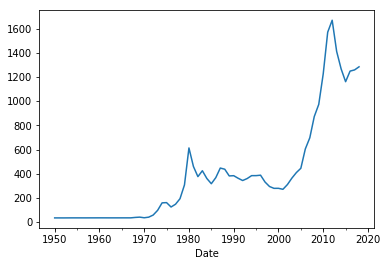

In [18]:
tsd.plot()

In [19]:
import statsmodels.api as sm
sm.stats.durbin_watson(tsd)
#Usaremos ARIMA porque el valor esta mas cercano al 0 y confirmar la correlacion

0.024020593895262635

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tsd, order=(4,0,2))
model_fit = model.fit()

/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [21]:
pred = model_fit.predict(start='2018-12', end='2021-12')


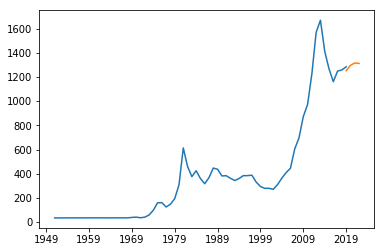

2018-12-31    1251.423588
2019-12-31    1295.642400
2020-12-31    1315.573198
2021-12-31    1311.504220
Freq: A-DEC, dtype: float64
Date
1950-12-31    34.729167
1951-12-31    34.717500
1952-12-31    34.628333
1953-12-31    34.879167
1954-12-31    35.020000
Freq: A-DEC, Name: Price, dtype: float64


In [22]:
plt.plot(tsd)
plt.plot(pred)
plt.show()

print pred.head()
print tsd.head()